In [4]:
import pandas as pd

In [5]:
!ls ./movielens

README.txt  links.csv   movies.csv  ratings.csv tags.csv


In [6]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')
print(type(ratings))
ratings.head()

<class 'pandas.core.frame.DataFrame'>


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [36]:
is_horror = movies['genres'].str.contains('Horror')

horror = movies[is_horror]
horror.head(10)

,movieId,title,genres
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
90,92,Mary Reilly (1996),Drama|Horror|Thriller
91,93,Vampire in Brooklyn (1995),Comedy|Horror|Romance
150,152,"Addiction, The (1995)",Drama|Horror
175,177,Lord of Illusions (1995),Horror
181,183,Mute Witness (1994),Comedy|Horror|Thriller
186,188,"Prophecy, The (1995)",Fantasy|Horror|Mystery
194,196,Species (1995),Horror|Sci-Fi


In [37]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.head(10)

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592
5,6,3.834930
6,7,3.366484
7,8,3.142049
8,9,3.004924
9,10,3.430029


In [38]:
joined = average_rating.merge(horror, on='movieId', how='inner')
joined.head(10)
# joined.corr()

,movieId,rating,title,genres
0,12,2.619766,Dracula: Dead and Loving It (1995),Comedy|Horror
1,22,3.319400,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
2,70,3.277454,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
3,92,2.854103,Mary Reilly (1996),Drama|Horror|Thriller
4,93,2.528739,Vampire in Brooklyn (1995),Comedy|Horror|Romance
5,152,3.104455,"Addiction, The (1995)",Drama|Horror
6,177,2.885912,Lord of Illusions (1995),Horror
7,183,3.364821,Mute Witness (1994),Comedy|Horror|Thriller
8,188,3.342474,"Prophecy, The (1995)",Fantasy|Horror|Mystery
9,196,2.850271,Species (1995),Horror|Sci-Fi


In [39]:
joined['year'] = joined['title'].str.extract('.*\((.*)\).*', expand=True)
joined.head(10)

,movieId,rating,title,genres,year
0,12,2.619766,Dracula: Dead and Loving It (1995),Comedy|Horror,1995
1,22,3.319400,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,1995
2,70,3.277454,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,1996
3,92,2.854103,Mary Reilly (1996),Drama|Horror|Thriller,1996
4,93,2.528739,Vampire in Brooklyn (1995),Comedy|Horror|Romance,1995
5,152,3.104455,"Addiction, The (1995)",Drama|Horror,1995
6,177,2.885912,Lord of Illusions (1995),Horror,1995
7,183,3.364821,Mute Witness (1994),Comedy|Horror|Thriller,1994
8,188,3.342474,"Prophecy, The (1995)",Fantasy|Horror|Mystery,1995
9,196,2.850271,Species (1995),Horror|Sci-Fi,1995


In [47]:
joined['rating'].describe()

count    2590.000000
mean        2.696796
std         0.720493
min         0.500000
25%         2.307095
50%         2.790570
75%         3.190075
max         5.000000
Name: rating, dtype: float64

In [54]:
data_set = joined[['rating','year']].groupby('year', as_index=False).mean()
data_set.head()

,year,rating
0,1910,3.466667
1,1913,3.250000
2,1914,3.285714
3,1915,3.433333
4,1919,3.187500


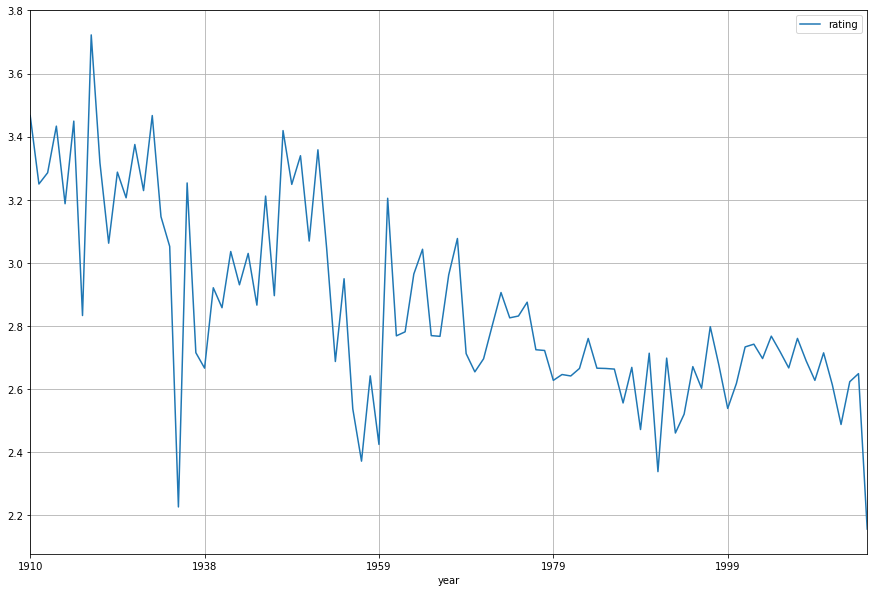

In [52]:
%matplotlib inline
data_set[-100:].plot(x='year', y='rating', figsize=(15,10), grid=True)